# Problem Definition : Predict the price of a house.

# Hypothesis Generated:

Price of a House will be affected by following -

1. House Age
2. Distance from nearest Metro station (km)
3. Number of convenience stores
4. Number of bedrooms
5. House Size
6. House price of unit area

# Load Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')
import datetime as dt

# Load Data:

In [2]:
data = pd.read_csv('DS - Assignment Part 1 data set.csv')

In [3]:
data.head(10)

Transaction date  House Age  Distance from nearest Metro station (km)  \
0          2012.917       32.0                                  84.87882   
1          2012.917       19.5                                 306.59470   
2          2013.583       13.3                                 561.98450   
3          2013.500       13.3                                 561.98450   
4          2012.833        5.0                                 390.56840   
5          2012.667        7.1                                2175.03000   
6          2012.667       34.5                                 623.47310   
7          2013.417       20.3                                 287.60250   
8          2013.500       31.7                                5512.03800   
9          2013.417       17.9                                1783.18000   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   
5                             3  24.96305  121.51254                   3   
6                             7  24.97933  121.53642                   3   
7                             6  24.98042  121.54228                   3   
8                             1  24.95095  121.48458                   1   
9                             3  24.96731  121.51486                   2   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3  
3                875                      54.8  
4                491                      43.1  
5                828                      32.1  
6               1115                      40.3  
7               1316                      46.7  
8                588                      18.8  
9               1075                      22.1

In [4]:
data["Transaction date"]

0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: Transaction date, Length: 414, dtype: float64

In [5]:
data.head()

Transaction date  House Age  Distance from nearest Metro station (km)  \
0          2012.917       32.0                                  84.87882   
1          2012.917       19.5                                 306.59470   
2          2013.583       13.3                                 561.98450   
3          2013.500       13.3                                 561.98450   
4          2012.833        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3  
3                875                      54.8  
4                491                      43.1

In [6]:
data.shape

(414, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [8]:
data.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [9]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [10]:
data.index

RangeIndex(start=0, stop=414, step=1)

In [11]:
data.describe()

Transaction date   House Age  Distance from nearest Metro station (km)  \
count        414.000000  414.000000                                414.000000   
mean        2013.148971   17.712560                               1083.885689   
std            0.281967   11.392485                               1262.109595   
min         2012.667000    0.000000                                 23.382840   
25%         2012.917000    9.025000                                289.324800   
50%         2013.167000   16.100000                                492.231300   
75%         2013.417000   28.150000                               1454.279000   
max         2013.583000   43.800000                               6488.021000   

       Number of convenience stores    latitude   longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.094203   24.969030  121.533361   
std                        2.945562    0.012410    0.015347   
min                        0.000000   24.932070  121.473530   
25%                        1.000000   24.963000  121.528085   
50%                        4.000000   24.971100  121.538630   
75%                        6.000000   24.977455  121.543305   
max                       10.000000   25.014590  121.566270   

       Number of bedrooms  House size (sqft)  House price of unit area  
count          414.000000         414.000000                414.000000  
mean             1.987923         931.475845                 37.980193  
std              0.818875         348.910269                 13.606488  
min              1.000000         402.000000                  7.600000  
25%              1.000000         548.000000                 27.700000  
50%              2.000000         975.000000                 38.450000  
75%              3.000000        1234.750000                 46.600000  
max              3.000000        1500.000000                117.500000

# Variable Identification and Typecasting:

In [12]:
data.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [13]:
# converting the float to datetime format
data['Transaction date'] = pd.to_datetime(data['Transaction date'], format='%y%m%d')

# printing dataframe
print(data)
print()

print(data.dtypes)


    Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2020-01-02       32.0                                  84.87882   
1         2020-01-02       19.5                                 306.59470   
2         2020-01-03       13.3                                 561.98450   
3         2020-01-03       13.3                                 561.98450   
4         2020-01-02        5.0                                 390.56840   
..               ...        ...                                       ...   
409       2020-01-03       13.7                                4082.01500   
410       2020-01-02        5.6                                  90.45606   
411       2020-01-03       18.8                                 390.96960   
412       2020-01-03        8.1                                 104.81010   
413       2020-01-03        6.5                                  90.45606   

     Number of convenience stores  latitude  longitude  Number of bedrooms 

In [14]:
data["Transaction date"]

0     2020-01-02
1     2020-01-02
2     2020-01-03
3     2020-01-03
4     2020-01-02
         ...    
409   2020-01-03
410   2020-01-02
411   2020-01-03
412   2020-01-03
413   2020-01-03
Name: Transaction date, Length: 414, dtype: datetime64[ns]

In [15]:
data.head()

Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2020-01-02       32.0                                  84.87882   
1       2020-01-02       19.5                                 306.59470   
2       2020-01-03       13.3                                 561.98450   
3       2020-01-03       13.3                                 561.98450   
4       2020-01-02        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3  
3                875                      54.8  
4                491                      43.1

In [16]:
data.dtypes

Transaction date                            datetime64[ns]
House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                         int64
latitude                                           float64
longitude                                          float64
Number of bedrooms                                   int64
House size (sqft)                                    int64
House price of unit area                           float64
dtype: object

In [17]:
data['Number of bedrooms'] = data['Number of bedrooms'].astype('category')
data['Number of convenience stores'] = data['Number of convenience stores'].astype('category')

In [18]:
data.dtypes

Transaction date                            datetime64[ns]
House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                      category
latitude                                           float64
longitude                                          float64
Number of bedrooms                                category
House size (sqft)                                    int64
House price of unit area                           float64
dtype: object

In [19]:
# checking null values/ missing values
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

There are no missing values, then we don't need to drop NaN values.

In [20]:
data.head(10)

Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2020-01-02       32.0                                  84.87882   
1       2020-01-02       19.5                                 306.59470   
2       2020-01-03       13.3                                 561.98450   
3       2020-01-03       13.3                                 561.98450   
4       2020-01-02        5.0                                 390.56840   
5       2020-01-02        7.1                                2175.03000   
6       2020-01-02       34.5                                 623.47310   
7       2020-01-03       20.3                                 287.60250   
8       2020-01-03       31.7                                5512.03800   
9       2020-01-03       17.9                                1783.18000   

  Number of convenience stores  latitude  longitude Number of bedrooms  \
0                           10  24.98298  121.54024                  1   
1                            9  24.98034  121.53951                  2   
2                            5  24.98746  121.54391                  3   
3                            5  24.98746  121.54391                  2   
4                            5  24.97937  121.54245                  1   
5                            3  24.96305  121.51254                  3   
6                            7  24.97933  121.53642                  3   
7                            6  24.98042  121.54228                  3   
8                            1  24.95095  121.48458                  1   
9                            3  24.96731  121.51486                  2   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3  
3                875                      54.8  
4                491                      43.1  
5                828                      32.1  
6               1115                      40.3  
7               1316                      46.7  
8                588                      18.8  
9               1075                      22.1

# Multiplying House size (sqft) with House price of unit area to find the House_Price.

In [21]:
data["House_Price"] = data["House size (sqft)"]*data["House price of unit area"]

In [22]:
data.head(10)

Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2020-01-02       32.0                                  84.87882   
1       2020-01-02       19.5                                 306.59470   
2       2020-01-03       13.3                                 561.98450   
3       2020-01-03       13.3                                 561.98450   
4       2020-01-02        5.0                                 390.56840   
5       2020-01-02        7.1                                2175.03000   
6       2020-01-02       34.5                                 623.47310   
7       2020-01-03       20.3                                 287.60250   
8       2020-01-03       31.7                                5512.03800   
9       2020-01-03       17.9                                1783.18000   

  Number of convenience stores  latitude  longitude Number of bedrooms  \
0                           10  24.98298  121.54024                  1   
1                            9  24.98034  121.53951                  2   
2                            5  24.98746  121.54391                  3   
3                            5  24.98746  121.54391                  2   
4                            5  24.97937  121.54245                  1   
5                            3  24.96305  121.51254                  3   
6                            7  24.97933  121.53642                  3   
7                            6  24.98042  121.54228                  3   
8                            1  24.95095  121.48458                  1   
9                            3  24.96731  121.51486                  2   

   House size (sqft)  House price of unit area  House_Price  
0                575                      37.9      21792.5  
1               1240                      42.2      52328.0  
2               1060                      47.3      50138.0  
3                875                      54.8      47950.0  
4                491                      43.1      21162.1  
5                828                      32.1      26578.8  
6               1115                      40.3      44934.5  
7               1316                      46.7      61457.2  
8                588                      18.8      11054.4  
9               1075                      22.1      23757.5

In [23]:
data.shape

(414, 10)

In [24]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'House_Price'],
      dtype='object')

In [25]:
data['House_Price'] = data['House_Price'].astype('float64')

In [26]:
data.dtypes

Transaction date                            datetime64[ns]
House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                      category
latitude                                           float64
longitude                                          float64
Number of bedrooms                                category
House size (sqft)                                    int64
House price of unit area                           float64
House_Price                                        float64
dtype: object

# Target Variable:

Let us analyse our target variable that is House_Price.

In [27]:
data['House_Price'].mean()

35597.804106280164

In [28]:
data['House_Price'].median()

31224.2

In [29]:
data['House_Price'].std()

19890.892074674557

In [30]:
data['House_Price'].min()

5440.4

In [31]:
data['House_Price'].max()

161327.5

Or we can use describe() function

In [32]:
data['House_Price'].describe()

count       414.000000
mean      35597.804106
std       19890.892075
min        5440.400000
25%       20482.700000
50%       31224.200000
75%       48439.375000
max      161327.500000
Name: House_Price, dtype: float64

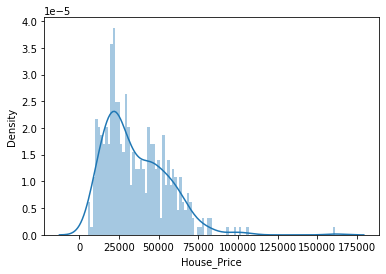

In [33]:
sns.distplot(data['House_Price'], bins = 100)
plt.show()

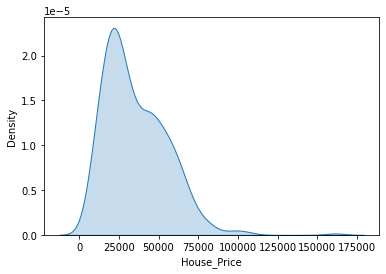

In [34]:
sns.kdeplot(data['House_Price'], shade = True)
plt.show()

Since there is a outlier between 150000 and 170000, we will take log of the House_Price for visualising it better.

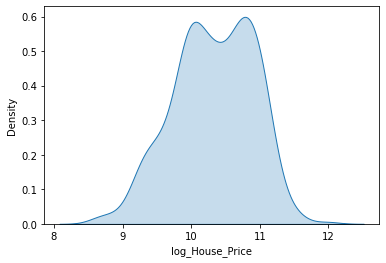

In [35]:
data['log_House_Price'] = np.log(data['House_Price'].values + 1)
sns.kdeplot(data['log_House_Price'], shade = True)
plt.show()

In [36]:
data['House_Price'].skew()

1.2249463929447417

In [37]:
data['House_Price'].kurtosis()

3.4887401711228145

In [38]:
data['log_House_Price'].skew()

-0.2878203243903275

In [39]:
data['log_House_Price'].kurtosis()

-0.3970977069637258

In [40]:
data.dtypes

Transaction date                            datetime64[ns]
House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                      category
latitude                                           float64
longitude                                          float64
Number of bedrooms                                category
House size (sqft)                                    int64
House price of unit area                           float64
House_Price                                        float64
log_House_Price                                    float64
dtype: object

1. The Price of the House is forming almost normal curve.
2. As noticed earlier, there is an outlier present between 150000 and 170000.

# Univariate Analysis:

We will check our hypothesis using univariate analysis of variables.

In [41]:
data['House_Price'].value_counts()

21792.5    1
36045.0    1
29542.4    1
24147.2    1
46943.6    1
          ..
23857.6    1
52581.2    1
16037.0    1
43725.0    1
70098.3    1
Name: House_Price, Length: 414, dtype: int64

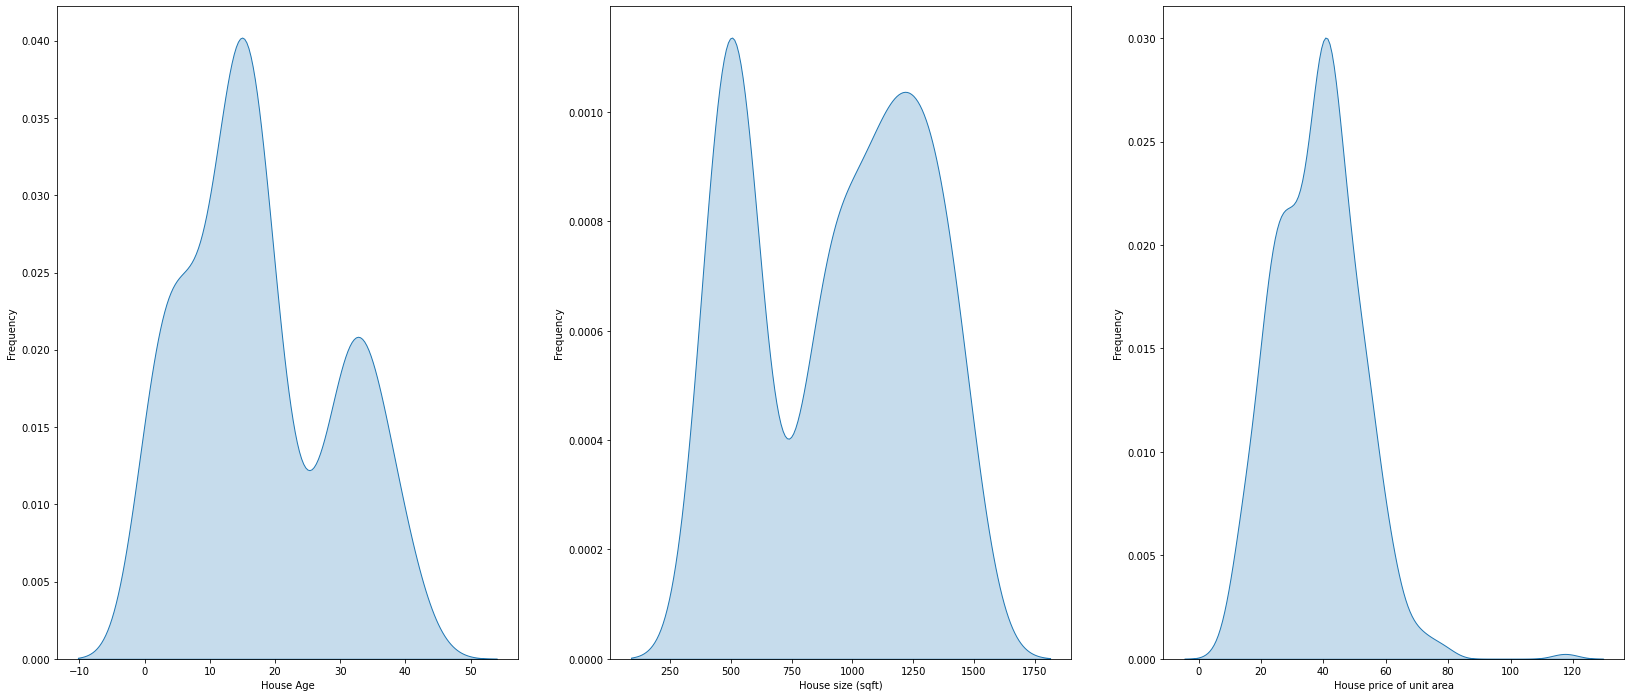

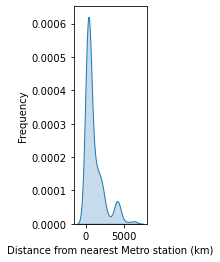

In [42]:
plt.figure(figsize=(38, 12))

plt.subplot(1, 4, 1)
sns.kdeplot(data['House Age'], shade = True)
plt.xlabel('House Age')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
sns.kdeplot(data['House size (sqft)'], shade = True)
plt.xlabel('House size (sqft)')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
sns.kdeplot(data['House price of unit area'], shade = True)
plt.xlabel('House price of unit area')
plt.ylabel('Frequency')
plt.show()

plt.subplot(1, 4, 4)
sns.kdeplot(data['Distance from nearest Metro station (km)'], shade = True)
plt.xlabel('Distance from nearest Metro station (km)')
plt.ylabel('Frequency')
plt.show()

Observation -

1. Most ages of the houses is near 10 to 15 years and then 30 to 40 years.
2. Most of the house sizes have areas around 500 to 600 sqft and 800 to 1500 sqft.
3. Highest house price of unit area is between 40 to 60.
4. Most of the house are not so far from the nearest metro station.

Observing trend in pickup datetime of trips

In [43]:
data['day_of_week'] = data['Transaction date'].dt.weekday

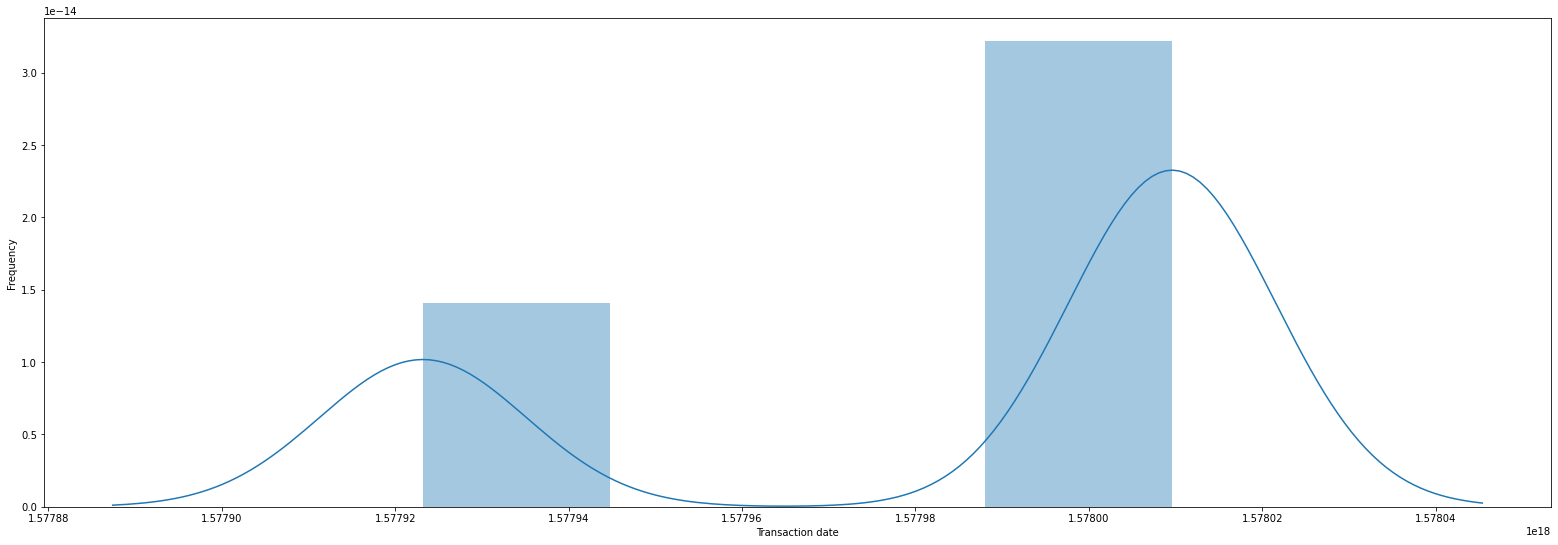

In [44]:
plt.figure(figsize=(27, 9))

sns.distplot(data['Transaction date'])
plt.xlabel('Transaction date')
plt.ylabel('Frequency')
plt.show()

In [45]:
data['month'] = data['Transaction date'].dt.month

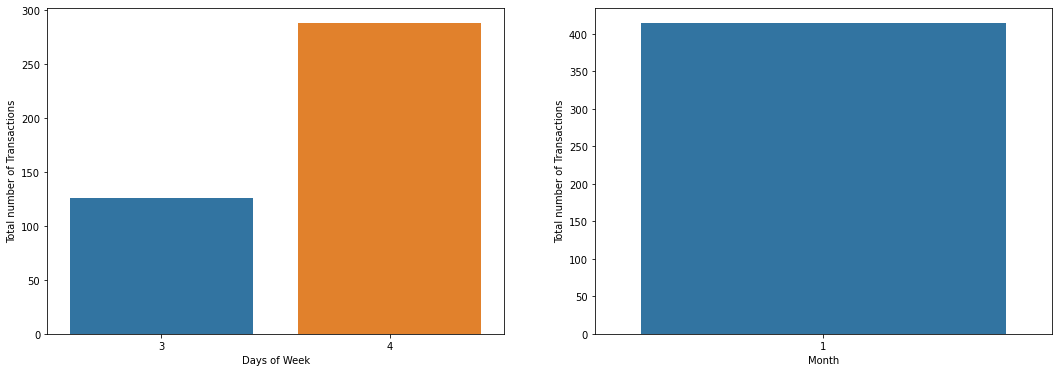

In [46]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(data['day_of_week'])
plt.xlabel('Days of Week')
plt.ylabel('Total number of Transactions')


plt.subplot(1, 2, 2)
sns.countplot(data['month'])
plt.xlabel('Month')
plt.ylabel('Total number of Transactions')
plt.show()



Observation -

1. Observing the above trend, we can see that the most of the Transaction are on Thursdays that is the 4th day of the week.
2. Total number of Transaction in a month is almost 400.

Observing latitude and longitude for location

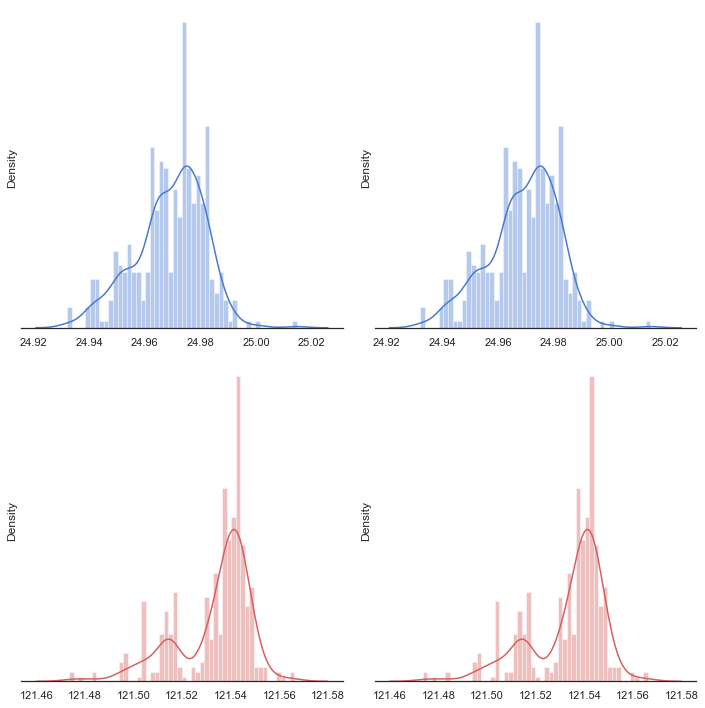

In [47]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10), sharex = False, sharey = False)
sns.despine(left=True)
sns.distplot(data['latitude'].values, label = 'latitude', color="b", bins = 50, ax=axes[0,0])
sns.distplot(data['latitude'].values, label = 'latitude', color="b", bins = 50, ax=axes[0,1])
sns.distplot(data['longitude'].values, label = 'longitude', color="r", bins =50, ax=axes[1,0])
sns.distplot(data['longitude'].values, label = 'longitude', color="r", bins =50, ax=axes[1,1])

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Latitude - Blue and Longitude - Red

Observation -

Most of the House in latitudes around 24.96 to 24.98 are denser, and longitude around 121.53 to 121.55 are denser.

Will we see more accurately with the House_Price in the further analysis that is bi-variate analysis.

# Bivariate Analysis:

We will compare each of the variables with the target variable, 'House_Price', in order to derive the relation between them.

In [48]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'House_Price', 'log_House_Price', 'day_of_week', 'month'],
      dtype='object')

In [49]:
data.head()

Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2020-01-02       32.0                                  84.87882   
1       2020-01-02       19.5                                 306.59470   
2       2020-01-03       13.3                                 561.98450   
3       2020-01-03       13.3                                 561.98450   
4       2020-01-02        5.0                                 390.56840   

  Number of convenience stores  latitude  longitude Number of bedrooms  \
0                           10  24.98298  121.54024                  1   
1                            9  24.98034  121.53951                  2   
2                            5  24.98746  121.54391                  3   
3                            5  24.98746  121.54391                  2   
4                            5  24.97937  121.54245                  1   

   House size (sqft)  House price of unit area  House_Price  log_House_Price  \
0                575                      37.9      21792.5         9.989367   
1               1240                      42.2      52328.0        10.865306   
2               1060                      47.3      50138.0        10.822554   
3                875                      54.8      47950.0        10.777935   
4                491                      43.1      21162.1         9.960014   

   day_of_week  month  
0            3      1  
1            3      1  
2            4      1  
3            4      1  
4            3      1

In [50]:
House_Price_with_age = pd.DataFrame(data.groupby(['Transaction date'])['House_Price'].median())
House_Price_with_age.reset_index(inplace = True)
House_Price_with_age['unit']=1

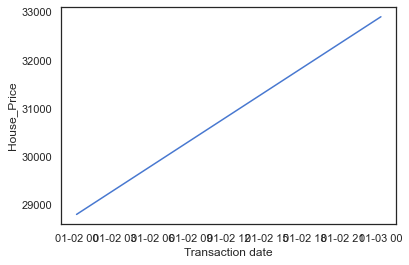

In [51]:
sns.lineplot(x= "Transaction date", y= "House_Price", data=House_Price_with_age[:400]);

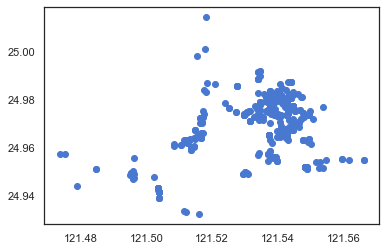

In [52]:
plt.scatter(x=data['longitude'], y=data['latitude'])
plt.show()

Observation- We an see that most of the Houses are in latitude 24.96 and 24.98 and in longitude 121.53 and 121.55.

The Map Visualizations are big and are not coming in the PDF so I am Pasting the Images for it and also because of large size it is seen empty space in some place after map visualization coding.

In [53]:
import plotly.express as px

fig = px.scatter_geo(data,lat='latitude',lon='longitude', hover_name = "House_Price")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

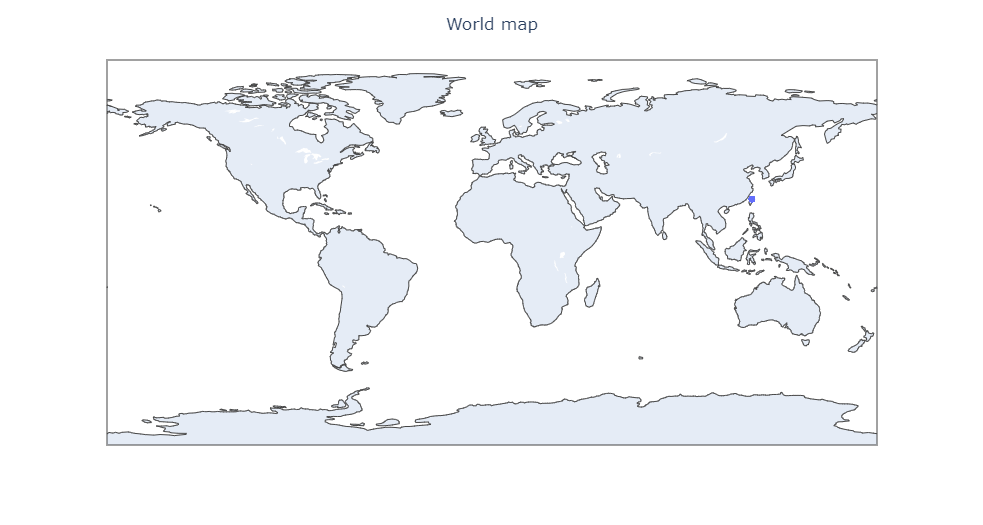

By map visualization we can say that the given location is of Taiwan.

In [54]:
#zoom of the above world map
fig = px.scatter_geo(data,lat='latitude',lon='longitude', hover_name = "House_Price")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

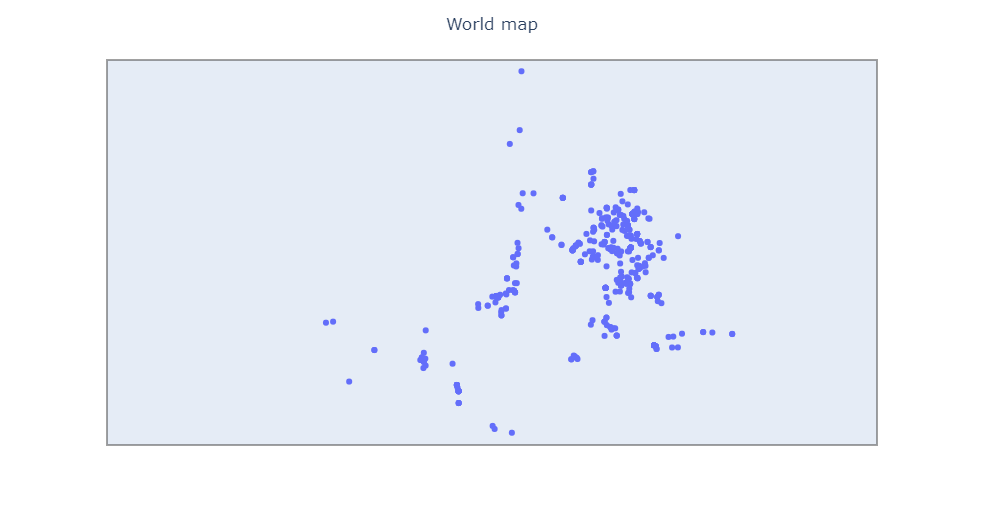

In [55]:
data.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'purple'), (1,'yellow')]

fig = px.scatter_mapbox(data, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="House_Price", 
                        hover_data=["House_Price", "House_Price"],
                        color="House_Price",
                        color_continuous_scale=color_scale,
                        size="House_Price",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

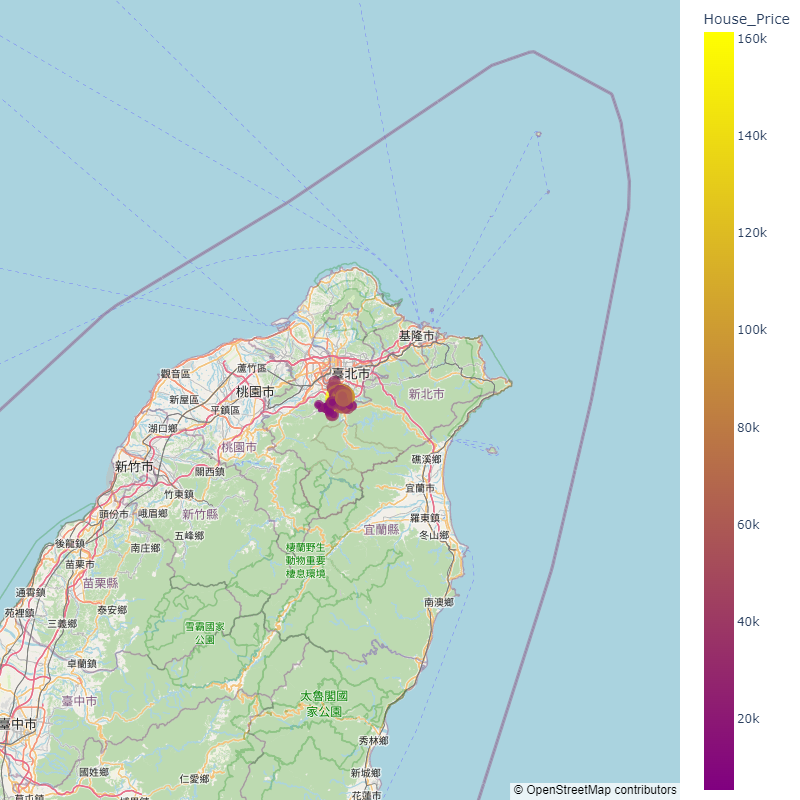

In [56]:
#zoom of the above map
data.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'purple'), (1,'yellow')]

fig = px.scatter_mapbox(data, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="House_Price", 
                        hover_data=["House_Price", "House_Price"],
                        color="House_Price",
                        color_continuous_scale=color_scale,
                        size="House_Price",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

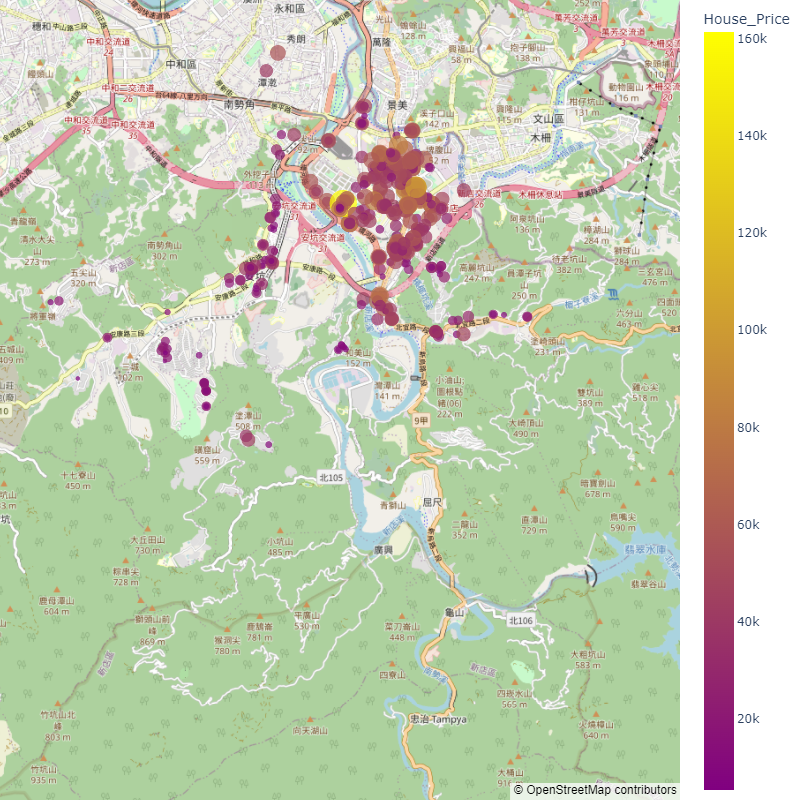

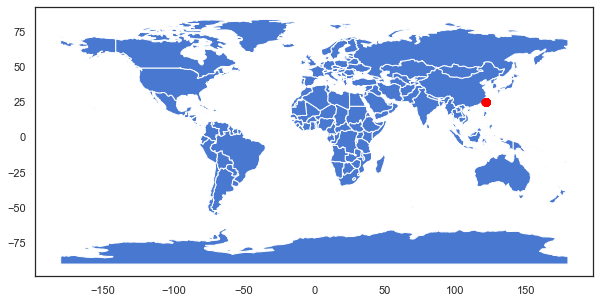

In [57]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=50);

In [58]:
data['geometry']

0      POINT (121.54024 24.98298)
1      POINT (121.53951 24.98034)
2      POINT (121.54391 24.98746)
3      POINT (121.54391 24.98746)
4      POINT (121.54245 24.97937)
                  ...            
409    POINT (121.50381 24.94155)
410    POINT (121.54310 24.97433)
411    POINT (121.53986 24.97923)
412    POINT (121.54067 24.96674)
413    POINT (121.54310 24.97433)
Name: geometry, Length: 414, dtype: geometry

In [59]:
data['geometry'].dtypes

In [60]:
House_Price_with_day_of_week = pd.DataFrame(data.groupby(['day_of_week'])['House_Price'].median())
House_Price_with_day_of_week.reset_index(inplace = True)
House_Price_with_day_of_week['unit']=1

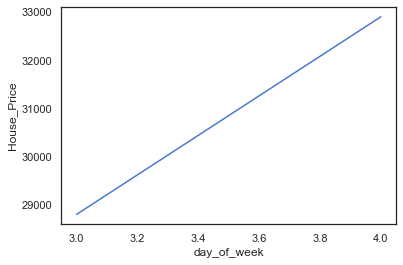

In [61]:
sns.lineplot(x='day_of_week', y='House_Price', data = House_Price_with_day_of_week[:800])
plt.show()

# House_Price and House Age

In [62]:
House_Price_with_Age = pd.DataFrame(data.groupby(['House Age'])['House_Price'].median())
House_Price_with_Age.reset_index(inplace = True)
House_Price_with_Age['unit']=1

In [63]:
House_Price_with_Age

House Age  House_Price  unit
0          0.0     59223.10     1
1          1.0     58000.80     1
2          1.1     46267.20     1
3          1.5     63585.80     1
4          1.7     59119.20     1
..         ...          ...   ...
231       40.9     39771.15     1
232       41.3     28257.90     1
233       41.4     33738.90     1
234       42.7     43560.20     1
235       43.8     42700.00     1

[236 rows x 3 columns]

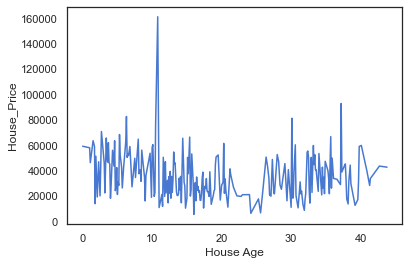

In [64]:
sns.lineplot(x= "House Age", y= "House_Price", data=House_Price_with_Age[:400]);

Observation -

Highest of House_Price is 160000 that can be seen with the House Age of 10 years. Which is an Outlier here.


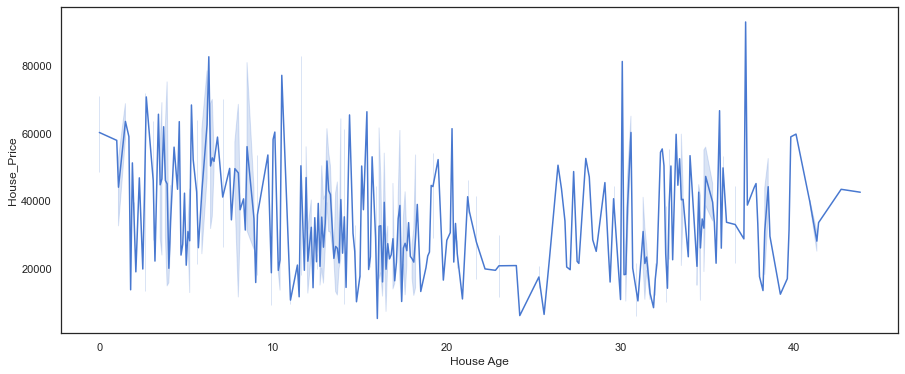

In [65]:
# Removing Outliers.
plt.figure(figsize=(15, 6))
House_Price_with_age_outliers = data[data['House_Price'] < 160000]
sns.lineplot(x = 'House Age', y = 'House_Price', data = House_Price_with_age_outliers)
plt.show()

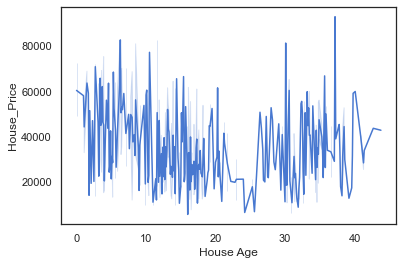

In [66]:
sns.lineplot(x='House Age', y='House_Price', data=House_Price_with_age_outliers[:1000])
plt.show()

Observation -

1. Highest House Price is 80000 with the House Age of 40 years.
2. There is a correlation between House_Price and House Age as it follows the similar trend.

# House_Price and House size (sqft)

In [67]:
House_Price_with_size = pd.DataFrame(data.groupby(['House size (sqft)'])['House_Price'].median())
House_Price_with_size.reset_index(inplace = True)
House_Price_with_size['unit']=1

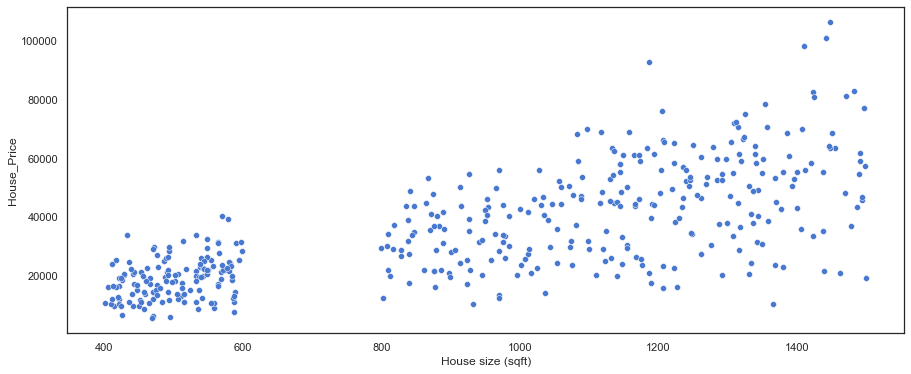

In [68]:
plt.figure(figsize=(15, 6))
House_Price_with_size_outliers = data[data['House_Price'] < 160000]
sns.scatterplot(x = 'House size (sqft)', y = 'House_Price', data = House_Price_with_size_outliers)
plt.show()

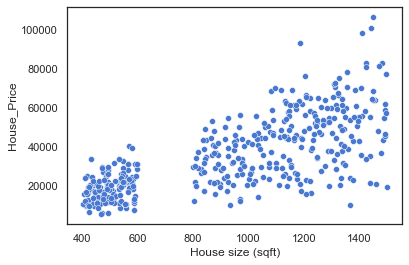

In [69]:
sns.scatterplot(x='House size (sqft)', y='House_Price', data = House_Price_with_size_outliers[:1000])
plt.show()

# House_Price and House price of unit area

In [70]:
House_Price_with_unit_area = pd.DataFrame(data.groupby(['House price of unit area'])['House_Price'].median())
House_Price_with_unit_area.reset_index(inplace = True)
House_Price_with_unit_area['unit']=1

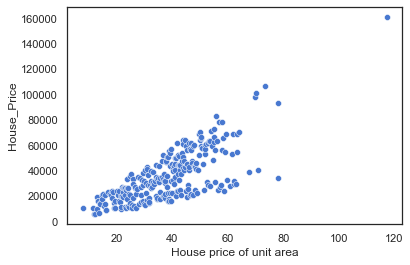

In [71]:
sns.scatterplot(x='House price of unit area', y='House_Price', data=House_Price_with_unit_area[:800])
plt.show()

Observation- 1. There is a outlier near House_Price 160000 and House price of unit area 120.

           2. Most of the House_Price and House price of unit area is between 20000 to 65000 and  25 to 50 repectively.  

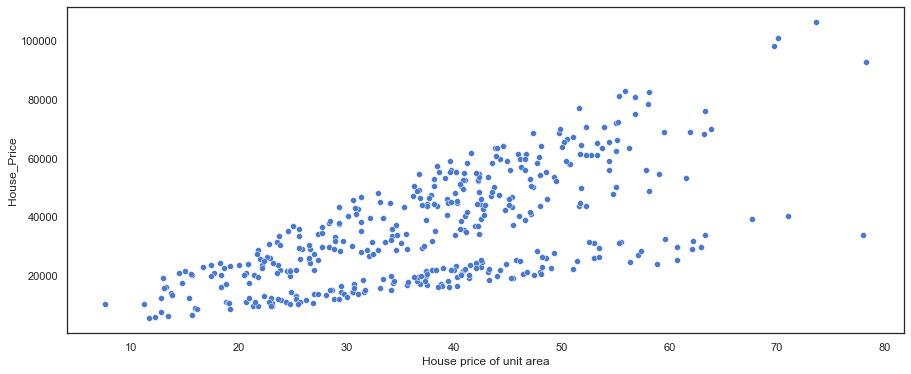

In [72]:
# Removing Outliers
plt.figure(figsize=(15, 6))
House_Price_with_unit_area_outliers = data[data['House_Price'] < 160000]
sns.scatterplot(x = 'House price of unit area', y = 'House_Price', data = House_Price_with_unit_area_outliers)
plt.show()

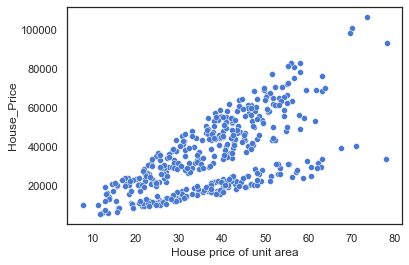

In [73]:
sns.scatterplot(x='House price of unit area', y='House_Price', data=House_Price_with_unit_area_outliers[:1000])
plt.show()

# House_Price and Distance from nearest Metro station (km)

In [74]:
House_Price_with_distance_from_station = pd.DataFrame(data.groupby(['Distance from nearest Metro station (km)'])['House_Price'].median())
House_Price_with_distance_from_station.reset_index(inplace = True)
House_Price_with_distance_from_station['unit']=1

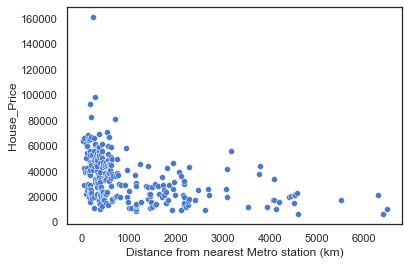

In [75]:
sns.scatterplot(x='Distance from nearest Metro station (km)', y='House_Price', data=House_Price_with_distance_from_station[:800])
plt.show()

Observation- Outliers around 0-500 kms and 160000 House_Price

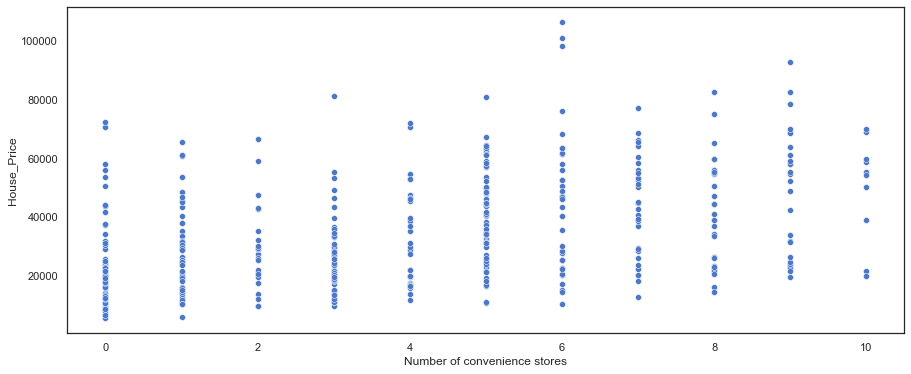

In [76]:
# Removing Outliers
plt.figure(figsize=(15, 6))
House_Price_with_distance_from_station_outliers = data[data['House_Price'] < 160000]
sns.scatterplot(x = 'Number of convenience stores', y = 'House_Price', data = House_Price_with_distance_from_station_outliers)
plt.show()

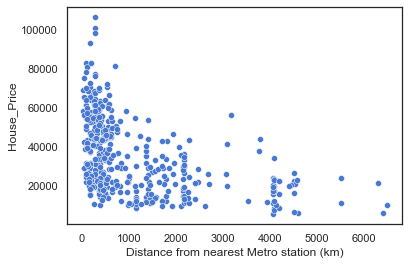

In [77]:
sns.scatterplot(x='Distance from nearest Metro station (km)', y='House_Price', data=House_Price_with_distance_from_station_outliers[:1000])
plt.show()

# House_Price and Number of convenience stores

In [78]:
data['Number of convenience stores'].value_counts()

0     67
5     67
1     46
3     46
6     37
4     31
7     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

In [79]:
data['Number of convenience stores'].mode()

0    0
1    5
Name: Number of convenience stores, dtype: category
Categories (11, int64): [0, 1, 2, 3, ..., 7, 8, 9, 10]

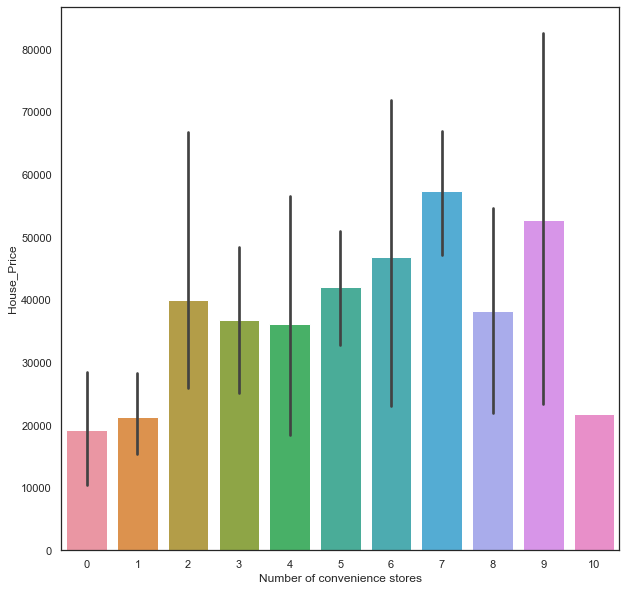

In [80]:
plt.figure(figsize=(10, 10))
sns.barplot(x="Number of convenience stores", y="House_Price", data=data[:50])
plt.show()

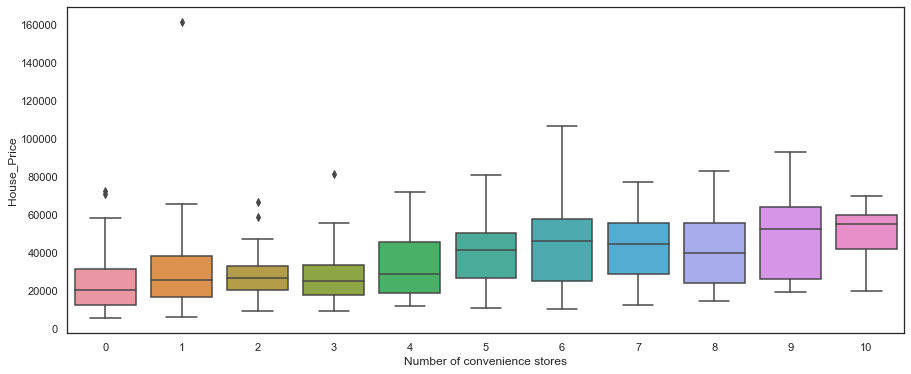

In [81]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = 'Number of convenience stores', y = 'House_Price', data = data)
plt.show()

Observation -

• As we can see, there is a huge outlier/extreme point for Number of convenience store 1.

• Let's remove the outliers and observe the above data closely.

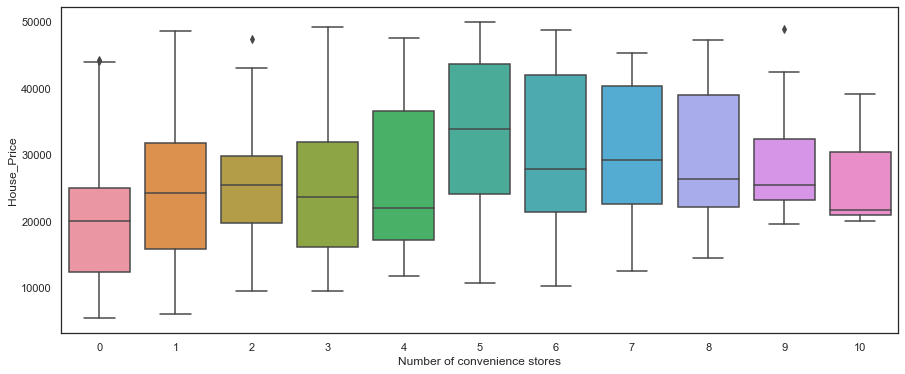

In [82]:
#Removing Outliers
plt.figure(figsize=(15, 6))
hp_cvnstr_outliers = data[data['House_Price'] < 50000]
sns.boxplot(x = 'Number of convenience stores', y = 'House_Price', data = hp_cvnstr_outliers)
plt.show()

# House_Price and Number of Bedrooms

In [83]:
data['Number of bedrooms'].dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [84]:
data['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [85]:
data['Number of bedrooms'].mode()

0    1
Name: Number of bedrooms, dtype: category
Categories (3, int64): [1, 2, 3]

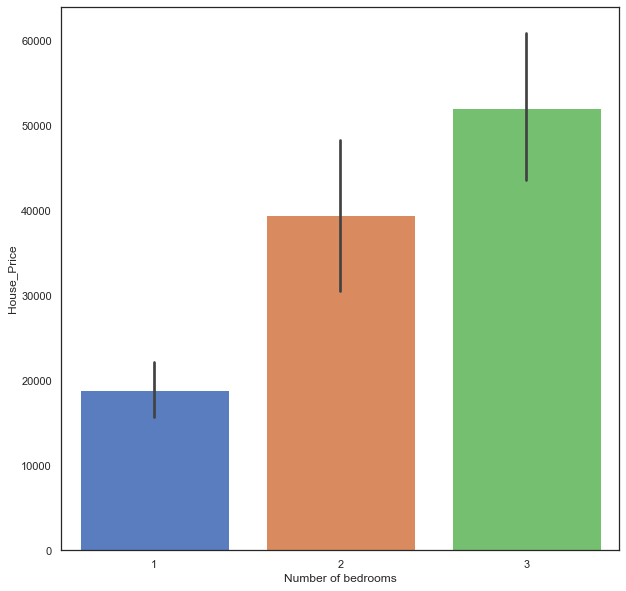

In [86]:
plt.figure(figsize=(10, 10))
sns.barplot(x="Number of bedrooms", y="House_Price", data=data[:50])
plt.show()

Observation -
The more the Number of Bedrooms higher the House_Price.

# Correlation Heatmap

We will check the correlations amongst all of the variables using heatmap.

In [87]:
data.head()

Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2020-01-02       32.0                                  84.87882   
1       2020-01-02       19.5                                 306.59470   
2       2020-01-03       13.3                                 561.98450   
3       2020-01-03       13.3                                 561.98450   
4       2020-01-02        5.0                                 390.56840   

  Number of convenience stores  latitude  longitude Number of bedrooms  \
0                           10  24.98298  121.54024                  1   
1                            9  24.98034  121.53951                  2   
2                            5  24.98746  121.54391                  3   
3                            5  24.98746  121.54391                  2   
4                            5  24.97937  121.54245                  1   

   House size (sqft)  House price of unit area  House_Price  log_House_Price  \
0                575                      37.9      21792.5         9.989367   
1               1240                      42.2      52328.0        10.865306   
2               1060                      47.3      50138.0        10.822554   
3                875                      54.8      47950.0        10.777935   
4                491                      43.1      21162.1         9.960014   

   day_of_week  month                    geometry  
0            3      1  POINT (121.54024 24.98298)  
1            3      1  POINT (121.53951 24.98034)  
2            4      1  POINT (121.54391 24.98746)  
3            4      1  POINT (121.54391 24.98746)  
4            3      1  POINT (121.54245 24.97937)

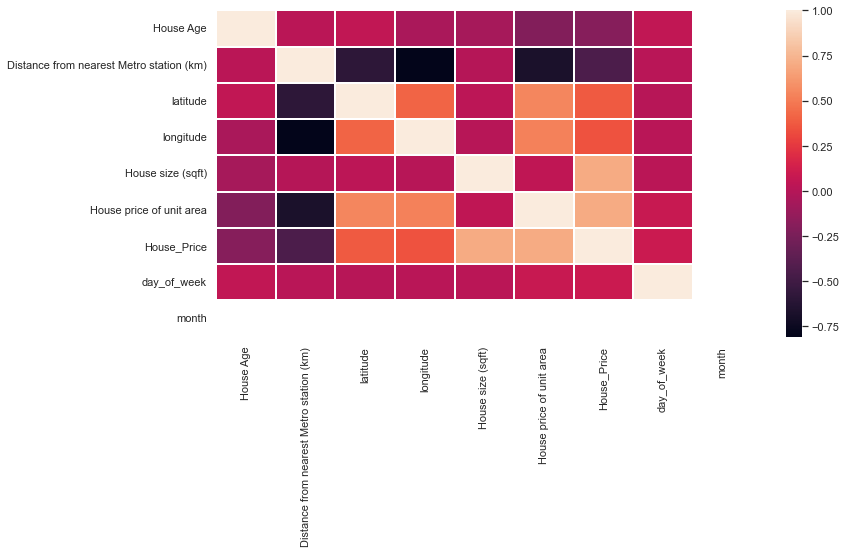

In [88]:
# From the above dataset, we will drop log_House_Price and 
# Transaction date column which are irrelevant with our target variable House_Price.

data_drop = data.drop(['Transaction date', 'log_House_Price'], axis=1)

plt.figure(figsize=(12, 6))
corr = data_drop.corr('pearson')
sns.heatmap(corr, linewidth=2)
plt.show()

Observation -

From the above correlation heatmap, we see that the House Age and House price if unit area have higher correlation with the target as compared to the others.

# Conclusion

1. The House_Price is forming almost normal curve.

2. As noticed earlier, there is an outlier present near 160000.

3. There are no missing values, then we don't need to drop NaN values

4. Most ages of the houses is near 10 to 15 years and then 30 to 40 years.

5. Most of the house sizes have areas around 500 to 600 sqft and 800 to 1500 sqft.

6. Highest house price of unit area is between 40 to 60.

7. Most of the house are not so far from the nearest metro station.

8. Observing the above trend, we can see that the most of the Transaction are on Thursdays that is the 4th day of the week.

9. Total number of Transaction in a month is almost 400.

10. Most of the House in latitudes around 24.96 to 24.98 are denser, and longitude around 121.53 to 121.55 are denser.

11. By map visualization we can say that the given location is of Taiwan.

12. Highest House Price is 80000 with the House Age of 40 years.

13. There is a correlation between House_Price and House Age as it follows the similar trend.

14. Most of the House_Price and House price of unit area is between 20000 to 65000 and  25 to 50 repectively. 

15. There is a huge outlier/extreme point for Number of convenience store 1.

16. The more the Number of Bedrooms higher the House_Price.

17. Log_House_Price and Transaction date column which are irrelevant with our target variable House_Price

18. We see that the have higher correlation with the target as compared to the others.